# Step 1:
# HGTV SHOW
-HGTV is launching a show based on homes in kings county. The goal of the show is to show homeowners what predictors lead to a higher listing price so the owner can sell and maximize profit.
- 

# IMPORTING LIBRARIES 

In [1]:
#importing the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from statsmodels.tools.eval_measures import rmse
from statsmodels.api import qqplot
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from folium.plugins import FastMarkerCluster
import folium
from sklearn.metrics import r2_score

In [2]:
#loading in the data and making a pandas dataframe.
df = pd.read_csv('data/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# EDA(EXPLORITORY DATA ANALYSIS)

In [3]:
#Exploring the columns and values.
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#Exploring some low hanging data.
#some standouts: Avaerage house in this county have 3 bedrooms and 2 bathrooms.
# Theres a hosue in the set that gas 33 bedrooms and 8 bathroom which will defiently be an outlier.
# oldest house is dated to 1900. While he most recent hosue was built in 2015. 
df.describe()
#ON AVERGAE ABOUT 3 BEDROOMS AND 2 BATHROOMS PER HOUSE
# MOST RECENT HOUSE WAS BUILT IN 2015. OLDEST HOUSE WAS BUILT IN 1900

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


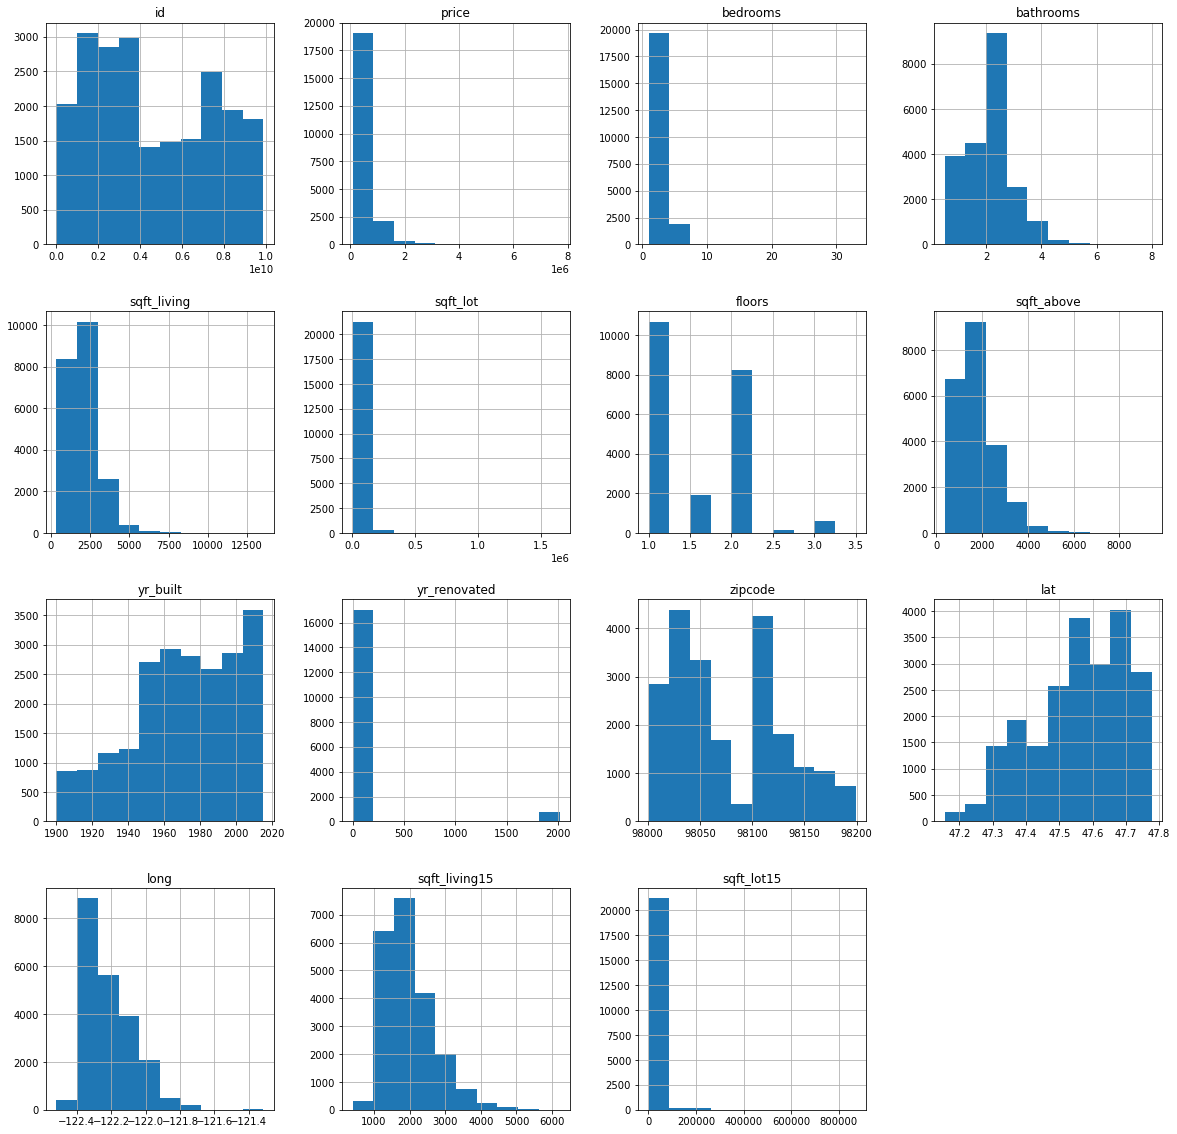

In [5]:
df.hist(figsize=(20,20));

In [57]:
#exploring and filtering
#dropping houses that are repeated. some houses are repeated if they had rennovations done.
# Filling in waterfront's NA values with 0 
#dropping years renovated column because a large amount og
df.drop_duplicates(subset='id',keep='first',inplace=True)
df['waterfront'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  object 
 9   view           21357 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   17616 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

In [31]:
for column in list(df.columns):
    print(column, sum(df[column].isnull()))

id 0
date 0
price 0
bedrooms 0
bathrooms 0
sqft_living 0
sqft_lot 0
floors 0
waterfront 0
view 63
condition 0
grade 0
sqft_above 0
sqft_basement 0
yr_built 0
yr_renovated 3804
zipcode 0
lat 0
long 0
sqft_living15 0
sqft_lot15 0


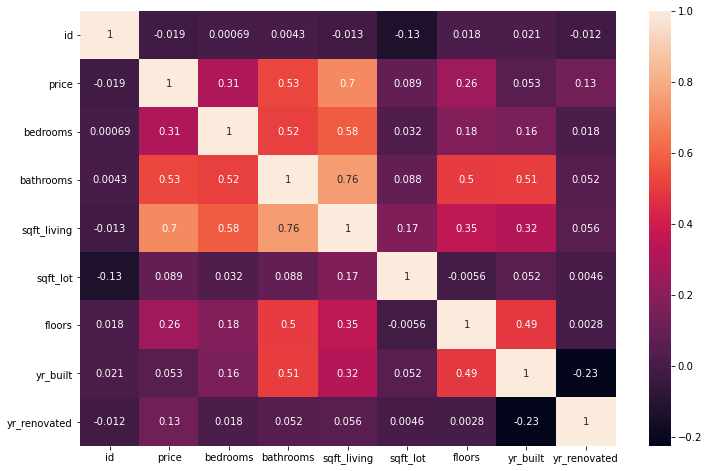

In [34]:
drop_vars = ['date','sqft_above', 'sqft_basement',
             'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
df_corr = df.drop(columns=drop_vars)

# generate heatmap to display correlations
corr = df_corr.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True);


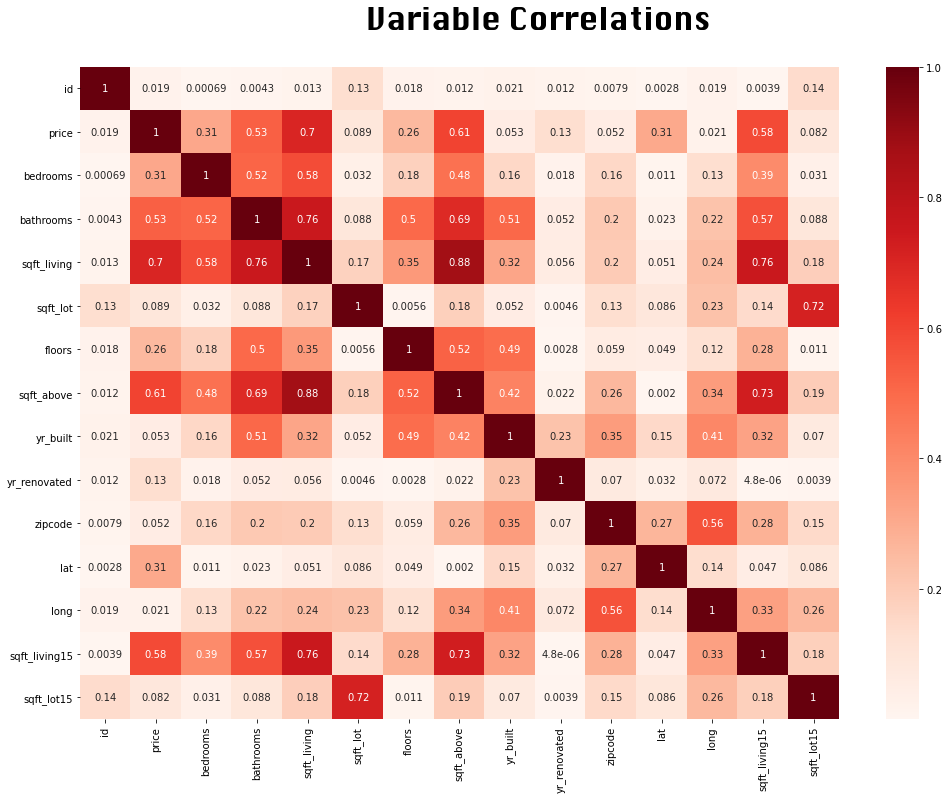

In [42]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95, fontname='Silom')
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)

In [45]:
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_with_price = pd.DataFrame({'Correlations':correlations, 'Features': features})

Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features})
print('Multicollinear Features')
display(MC_df)
print('Correlations with Price')
display(MC_df)

Multicollinear Features


,Correlations,Features
0,0.876533,"[sqft_living, sqft_above]"
1,0.876533,"[sqft_above, sqft_living]"


Correlations with Price


,Correlations,Features
0,0.876533,"[sqft_living, sqft_above]"
1,0.876533,"[sqft_above, sqft_living]"


/Users/olamideholayinka/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'House View and Price')

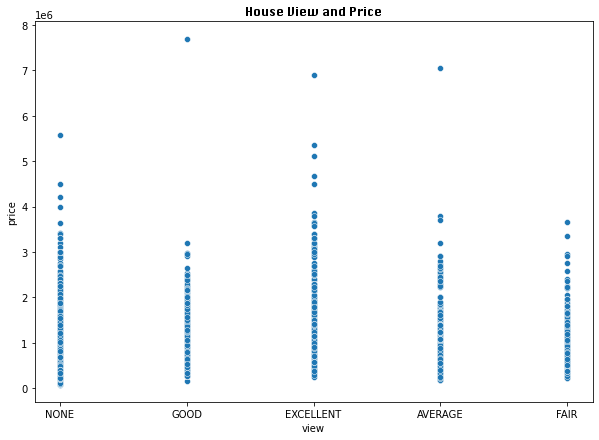

In [59]:
plt.figure(figsize=(10,7))
sns.scatterplot(df['view'], df['price'])
plt.title('House View and Price', fontsize=12, fontname='silom')

/Users/olamideholayinka/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'House Condition and Grade')

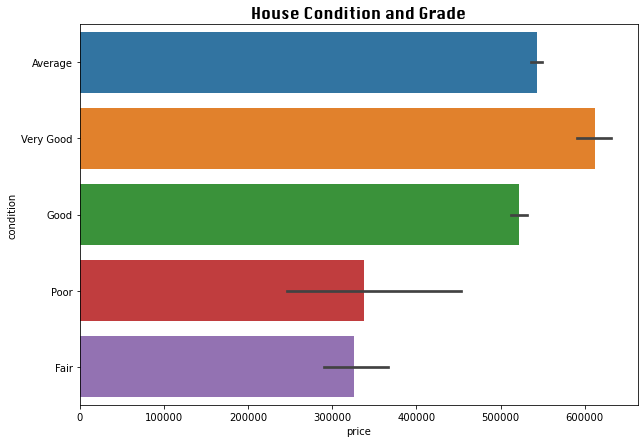

In [61]:
plt.figure(figsize=(10,7))
sns.barplot(df['price'], df['condition'])
plt.title('House Condition and Grade', fontsize=15, fontname='silom')

#  STEP 2 
# CHECKING  FOR PRE-MODEL ASSUMPTIONS. 

In [ ]:
# CHECKING FOR LINEARITY 


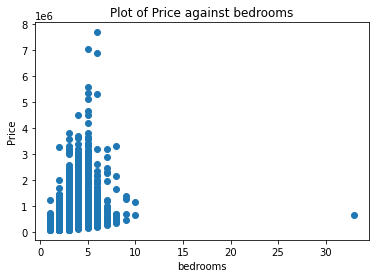

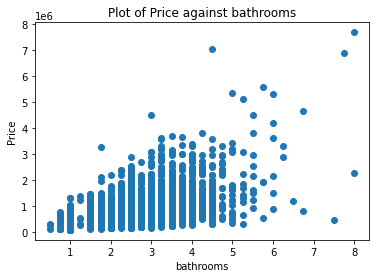

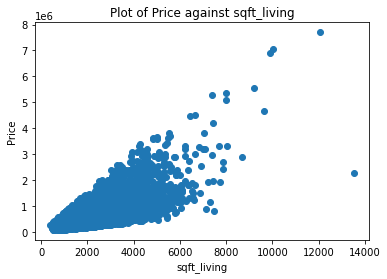

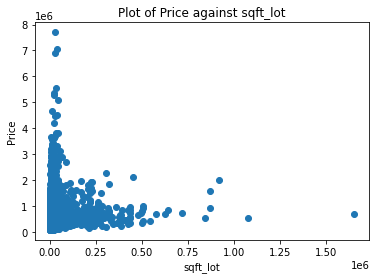

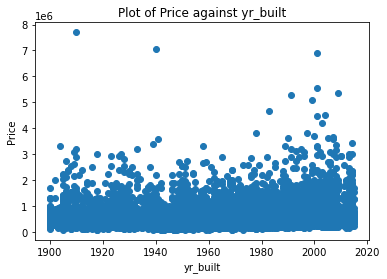

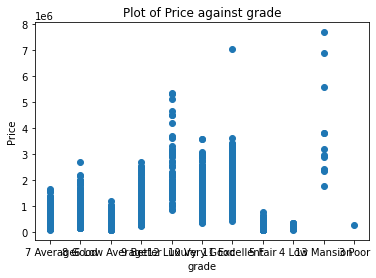

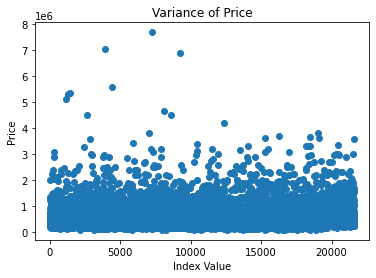

In [36]:
features = X_train.columns

for x in features:
    plt.scatter(X_train[x], y_train)
    plt.title(f'Plot of Price against {x}')
    plt.xlabel(x)
    plt.ylabel('Price')
    plt.show()
    
# also plot sales against itself
plt.scatter(y_train.index, y_train)
plt.hlines(y_train.mean(), 0, 200)
plt.xlabel('Index Value')
plt.ylabel('Price')
plt.title('Variance of Price')
plt.show()

In [62]:
train_df = pd.concat([X_train, y_train], axis =1)

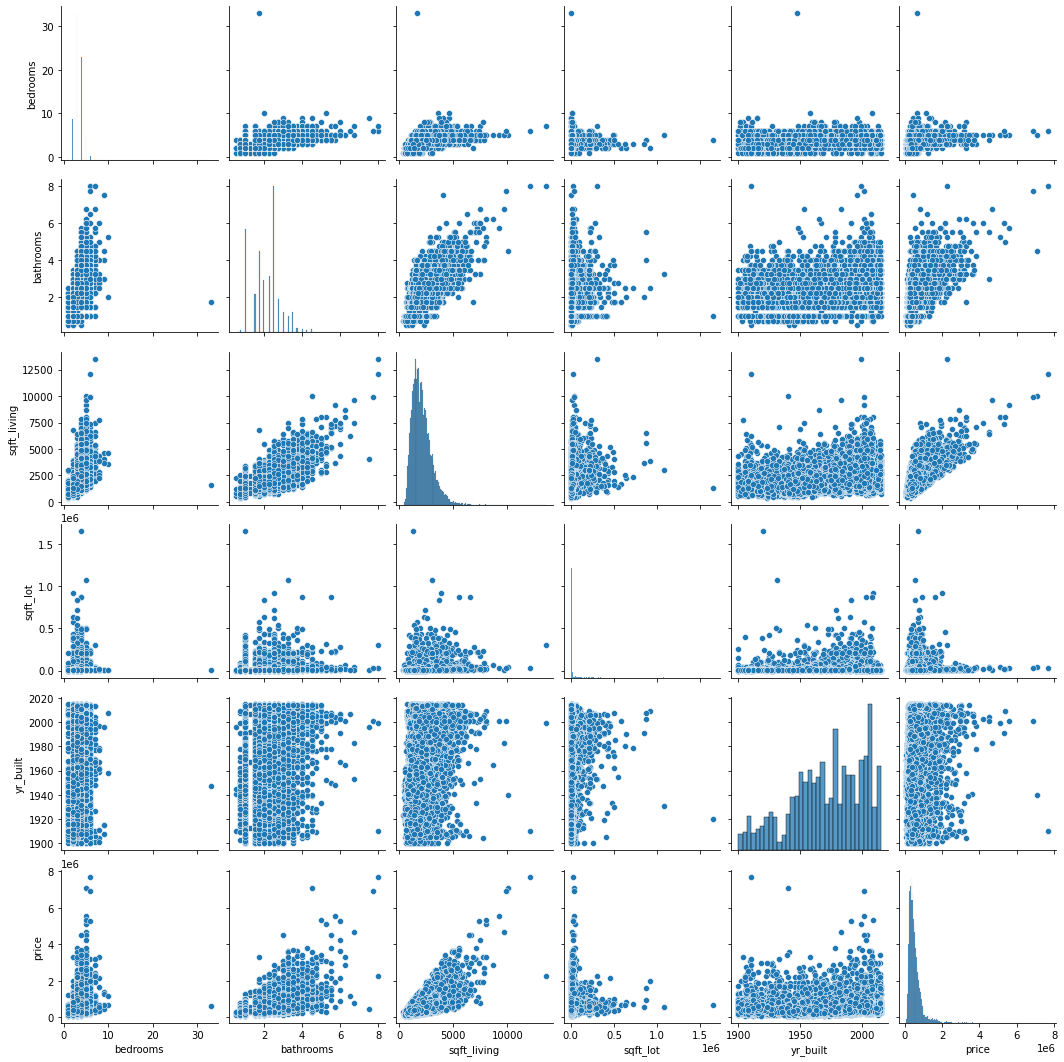

In [63]:
sns.pairplot(train_df)
plt.show()

# STEP 3 TRAIN TEST SPLIT

In [35]:
y = df.price
X = df[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot','yr_built','grade' ]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

# STEP 4 ONE HOT ENCODE CATEGORICAL VARIABLE

In [ ]:
#grade

In [46]:
ohe = OneHotEncoder()
ohe.fit_transform(X_train)

<17136x9494 sparse matrix of type '<class 'numpy.float64'>'
	with 102816 stored elements in Compressed Sparse Row format>

In [ ]:
train_df.corr()

# STEP 5 CREATING DUMMY BASELINE

In [47]:
#Dummy Regressor for the baseline. DUMMY IS ONLY APPLIED ON TRAINING SET
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_train)

array([542950.3173436, 542950.3173436, 542950.3173436, ...,
       542950.3173436, 542950.3173436, 542950.3173436])

In [48]:
dummy_regr.score(X_train, y_train)# the R score is zero.  The mean of Y explains 0% of the variation of sales price. 

0.0

In [ ]:
# NEXT BUILD FIRST SIMPLE MODEL THAT DOES BETTER THAN THE DUMMY REGRESSOR. WHICH WAS 0
# CAN USE THE 

In [49]:
y_train.shape
y_train

13634    450000.0
13631    898000.0
5717     487500.0
15431    299980.0
17294    518000.0
           ...   
11383    275000.0
12069    597000.0
5432     342000.0
868      381156.0
15941    850000.0
Name: price, Length: 17136, dtype: float64

# RUNNING A SIMPLE MODEL WTIH VARIABLES []. THESE VARIBALES WERE CHOSEN BASED ON RFE OR VARS THAT ARE HIGHLY CORRELATED WITH SALES.

In [ ]:
# NOW CREATE FIRST SIMPLE MODEL THAT DOES BETTER THAN DUMMY REGRESSOR MEAN.
#EXAMPLES; RECURSIVE FEATURE ELIMINATION. LOOK AT HIGH CORRELATIONS VARIABLES TO Y.

#MODEL 1

In [54]:
Model_1 = ols(formula="price ~ grade + bathrooms", data=df).fit()
Model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     2236.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:03:57   Log-Likelihood:            -2.9671e+05
No. Observations:               21420   AIC:                         5.934e+05
Df Residuals:                   21408   BIC:                         5.935e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               8.388e+05   1.18e+04     71.379      0.000    8.16e+05    8.62e+05
grade[T.11 Excellent]   3.882e+05   1.47e+04     26.339      0.000    3.59e+05    4.17e+05
grade[T.12 Luxury]      1.062e+06    2.8e+04     38.006      0.000    1.01e+06    1.12e+06
grade[T.13 Mansion]     2.477e+06   7.03e+04     35.226      0.000    2.34e+06    2.61e+06
grade[T.3 Poor]         -6.35e+05   2.51e+05     -2.527      0.012   -1.13e+06   -1.43e+05
grade[T.4 Low]         -6.972e+05   4.93e+04    -14.143      0.000   -7.94e+05   -6.01e+05
grade[T.5 Fair]        -6.777e+05   1.89e+04    -35.827      0.000   -7.15e+05   -6.41e+05
grade[T.6 Low Average] -6.336e+05   1.08e+04    -58.912      0.000   -6.55e+05   -6.13e+05
grade[T.7 Average]     -5.787e+05   8687.943    -66.609      0.000   -5.96e+05   -5.62e+05
grade[T.8 Good]        -4.781e+05   8375.223    -57.086      0.000   -4.95e+05   -4.62e+05
grade[T.9 Better]      -2.721e+05   9001.676    -30.225      0.000    -2.9e+05   -2.54e+05
bathrooms               7.755e+04   3017.452     25.699      0.000    7.16e+04    8.35e+04
==============================================================================
Omnibus:                    15290.383   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           715703.702
Skew:                           2.914   Prob(JB):                         0.00
Kurtosis:                      30.712   Cond. No.                         365.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# SECOND MODEL

In [56]:
Model_2 = ols(formula="price ~bathrooms + bedrooms", data=df).fit()
Model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     4142.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:18:34   Log-Likelihood:            -3.0140e+05
No. Observations:               21420   AIC:                         6.028e+05
Df Residuals:                   21417   BIC:                         6.028e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.547e+04   8361.541     -4.242      0.000   -5.19e+04   -1.91e+04
bathrooms    2.39e+05   3240.812     73.754      0.000    2.33e+05    2.45e+05
bedrooms     2.07e+04   2692.095      7.691      0.000    1.54e+04     2.6e+04
==============================================================================
Omnibus:                    17197.290   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           897026.537
Skew:                           3.474   Prob(JB):                         0.00
Kurtosis:                      33.932   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Model_2 = ols(formula="price ~sqft_living + sqft_living15 ", data=df).fit()
Model_2.summary()S

In [ ]:
Model_3 = ols(formula="price ~sqft_living + sqft_living15 ", data=df).fit()

# KEY TAKEWAYS 